# Emotion Recognition Project

importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import cv2
# from google.colab import drive
# import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

Plot sample images of all classes

In [2]:
import os
import cv2
i=0
image_folder = '/kaggle/input/ferdata/train'
classes=[]
for filepath in os.listdir(image_folder):
    clas=[]
    filepath1=os.path.join(image_folder,filepath)
    for filename in os.listdir(filepath1):
        img = cv2.imread(os.path.join(filepath1,filename))
        i=i+1
        print(i)
        if img is not None:
            clas.append([img,str(filepath)])
    classes.append(clas)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [3]:
len(classes)

7

In [4]:
classes

[[[array([[[38, 38, 38],
           [44, 44, 44],
           [66, 66, 66],
           ...,
           [40, 40, 40],
           [48, 48, 48],
           [40, 40, 40]],
   
          [[39, 39, 39],
           [62, 62, 62],
           [67, 67, 67],
           ...,
           [42, 42, 42],
           [43, 43, 43],
           [42, 42, 42]],
   
          [[52, 52, 52],
           [64, 64, 64],
           [54, 54, 54],
           ...,
           [30, 30, 30],
           [41, 41, 41],
           [47, 47, 47]],
   
          ...,
   
          [[30, 30, 30],
           [38, 38, 38],
           [29, 29, 29],
           ...,
           [14, 14, 14],
           [19, 19, 19],
           [28, 28, 28]],
   
          [[24, 24, 24],
           [39, 39, 39],
           [36, 36, 36],
           ...,
           [13, 13, 13],
           [24, 24, 24],
           [26, 26, 26]],
   
          [[28, 28, 28],
           [33, 33, 33],
           [40, 40, 40],
           ...,
           [16, 16, 16],
          

In [5]:
classes[6][12][0]

array([[[120, 120, 120],
        [116, 116, 116],
        [114, 114, 114],
        ...,
        [ 71,  71,  71],
        [135, 135, 135],
        [147, 147, 147]],

       [[123, 123, 123],
        [121, 121, 121],
        [119, 119, 119],
        ...,
        [ 72,  72,  72],
        [120, 120, 120],
        [155, 155, 155]],

       [[124, 124, 124],
        [124, 124, 124],
        [123, 123, 123],
        ...,
        [ 83,  83,  83],
        [101, 101, 101],
        [154, 154, 154]],

       ...,

       [[103, 103, 103],
        [102, 102, 102],
        [115, 115, 115],
        ...,
        [104, 104, 104],
        [ 62,  62,  62],
        [ 14,  14,  14]],

       [[101, 101, 101],
        [106, 106, 106],
        [109, 109, 109],
        ...,
        [ 98,  98,  98],
        [ 57,  57,  57],
        [ 20,  20,  20]],

       [[103, 103, 103],
        [107, 107, 107],
        [110, 110, 110],
        ...,
        [ 91,  91,  91],
        [ 42,  42,  42],
        [ 15,  15,  15]]

In [6]:
plt.figure(figsize=(15,15))
k=0
for i in range(7):
    for j in range(5):
        k=k+1
        plt.subplot(7,5,k)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(classes[i][10+j][0])
        plt.xlabel(classes[i][10+j][1], color='red')
plt.show()

Plot the bar graph for the number of images in each class for both training and testing data



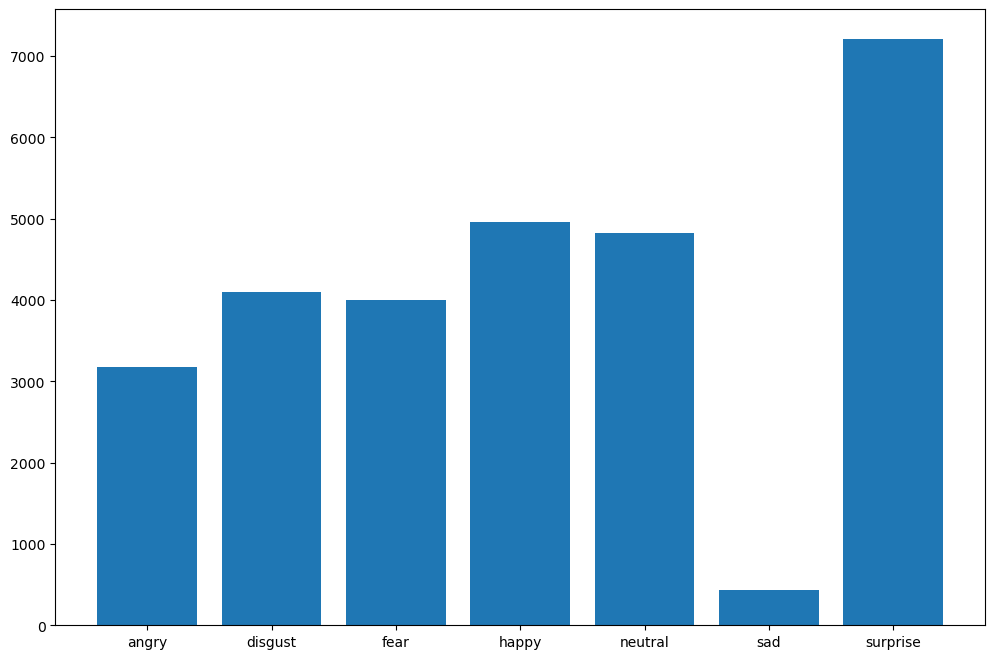

In [7]:
emotions=['angry','disgust','fear','happy','neutral','sad','surprise']
x=[]
for i in range(7):
    x.append(len(classes[i]))
plt.figure(figsize=(12,8))
plt.bar(emotions,x)
plt.show()

In [8]:

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_logical_devices('GPU')
strategy = tf.distribute.MirroredStrategy(gpus)

Num GPUs Available:  2


Build a data augmentation for train data to create new data with translation, rescale and flip, and rotation transformations. Rescale the image at 48x48

In [9]:
with strategy.scope():
    train_aug=ImageDataGenerator(rescale=1.0/255,
                                 rotation_range=20,
                                  shear_range=0.2,
                                  zoom_range=0.15,
                                  horizontal_flip=True,
                                  width_shift_range=0.3,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')
    train_gen=train_aug.flow_from_directory('/kaggle/input/ferdata/train',target_size=(48,48),batch_size=64,color_mode='grayscale',class_mode='categorical')


Found 28709 images belonging to 7 classes.


Build a data augmentation for test data to create new data and rescale the image at 48x48

In [10]:
with strategy.scope():
    test_aug=ImageDataGenerator(rescale=1.0/255)
    test_gen=test_aug.flow_from_directory('/kaggle/input/ferdata/test',target_size=(48,48),batch_size=64,color_mode='grayscale',class_mode='categorical')

Found 7178 images belonging to 7 classes.


# CNN Architecture

In [11]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

In [12]:
with strategy.scope():
    model1=Sequential()
    model1.add(Conv2D(32,(4,4),padding='same',input_shape=(48,48,1),activation='relu'))
    model1.add(MaxPooling2D(2,2))
    model1.add(Dropout(0.2))
    model1.add(Conv2D(32,(3,3), padding='same', activation='relu'))
    model1.add(BatchNormalization())
    model1.add(Dropout(0.25))
#     model1.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model1.add(MaxPooling2D(2,2))
#     model1.add(BatchNormalization())
#     model1.add(Dropout(0.25))
    model1.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model1.add(MaxPooling2D(2,2))
    model1.add(Flatten())
    model1.add(Dense(64,activation='relu'))
    model1.add(Dropout(0.25))
#     model1.add(Dense(64,activation='relu'))
#     model1.add(Dropout(0.25))
    model1.add(Dense(32,activation='relu'))
    model1.add(Dense(7,activation='softmax'))

In [14]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 32)       128       
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 32)        0

In [42]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [43]:
with strategy.scope():
    callback1 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [47]:
with strategy.scope():
    history=model1.fit_generator(generator=train_gen, validation_data=test_gen, steps_per_epoch=train_gen.n//64,
                                epochs=10,validation_steps = test_gen.n//64, callbacks=[callback1])

/tmp/ipykernel_28/96209855.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model1.fit_generator(generator=train_gen, validation_data=test_gen, steps_per_epoch=train_gen.n//64,


Epoch 1/10
448/448 [==============================] - 55s 124ms/step - loss: 1.5961 - accuracy: 0.3702 - val_loss: 1.4993 - val_accuracy: 0.4177
Epoch 2/10
448/448 [==============================] - 57s 128ms/step - loss: 1.5812 - accuracy: 0.3784 - val_loss: 1.5303 - val_accuracy: 0.4071
Epoch 3/10
448/448 [==============================] - 56s 126ms/step - loss: 1.5671 - accuracy: 0.3814 - val_loss: 1.4750 - val_accuracy: 0.4318
Epoch 4/10
448/448 [==============================] - 54s 119ms/step - loss: 1.5517 - accuracy: 0.3904 - val_loss: 1.4522 - val_accuracy: 0.4464
Epoch 5/10
448/448 [==============================] - 54s 120ms/step - loss: 1.5451 - accuracy: 0.3916 - val_loss: 1.5749 - val_accuracy: 0.3710
Epoch 6/10
448/448 [==============================] - 55s 124ms/step - loss: 1.5343 - accuracy: 0.3969 - val_loss: 1.4126 - val_accuracy: 0.4452
Epoch 7/10
448/448 [==============================] - 53s 119ms/step - loss: 1.5244 - accuracy: 0.4012 - val_loss: 1.4103 - val_ac

Here I tried to run for 10 epochs with early stopping and the loss reduced gradually and validation accuracy also increased prominently.

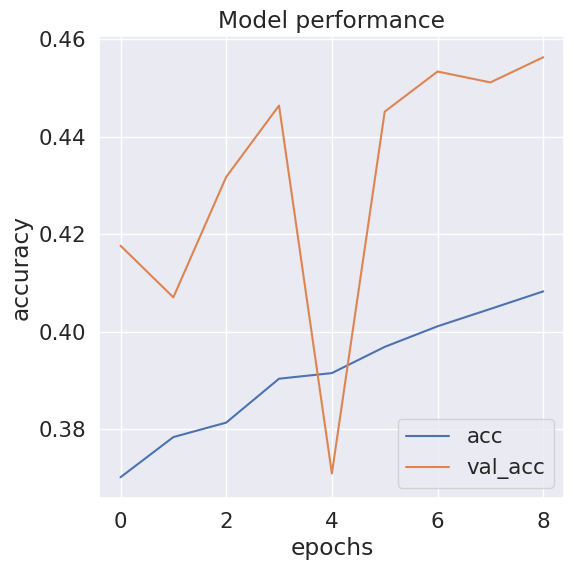

In [147]:
plt.figure(figsize=(6,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Model performance")
plt.legend(['acc','val_acc'],loc="lower right")
plt.show()

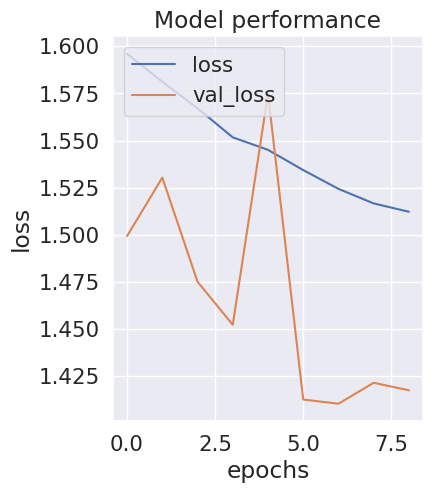

In [49]:
plt.figure(figsize=(4,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Model performance")
plt.legend(['loss','val_loss'],loc="upper left")
plt.show()

In [50]:
model1.save('cnn_model1_fer.h5')

In [51]:
predicted_class = model1.predict(test_gen)
predicted_class

113/113 [==============================] - 8s 62ms/step


array([[0.00749459, 0.0011243 , 0.00905199, ..., 0.024391  , 0.00566449,
        0.00558166],
       [0.2379105 , 0.00484614, 0.18462785, ..., 0.14712231, 0.34723014,
        0.01563067],
       [0.06877962, 0.00066306, 0.32476592, ..., 0.00993163, 0.00706474,
        0.5706357 ],
       ...,
       [0.09055801, 0.00598623, 0.1560081 , ..., 0.4283698 , 0.16777383,
        0.08981422],
       [0.1365906 , 0.00935458, 0.16589564, ..., 0.31622547, 0.29875064,
        0.04385488],
       [0.14449562, 0.00752424, 0.15345617, ..., 0.2899355 , 0.3617889 ,
        0.02130422]], dtype=float32)

In [52]:
np.argmax(predicted_class,axis=-1)

array([3, 5, 6, ..., 4, 4, 5])

In [53]:
pd.Series(test_gen.classes).value_counts()

3    1774
5    1247
4    1233
2    1024
0     958
6     831
1     111
dtype: int64

113/113 [==============================] - 14s 124ms/step


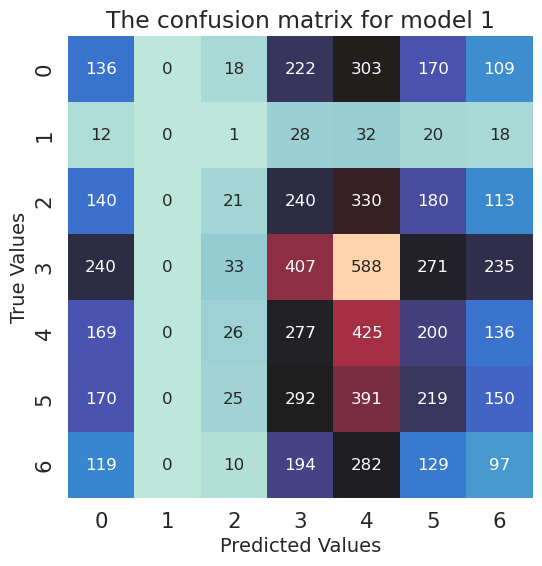

In [148]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


train_classes = np.array(train_gen.classes)
predicted_class = model1.predict(test_gen)
predictions = np.argmax(predicted_class, axis= -1)
actual_classes = np.array(test_gen.classes)

cm = confusion_matrix(actual_classes, predictions)
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(1,1,1)
sns.set(font_scale=1.4) #for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 12},
     cbar = False, fmt = 'd', cmap='icefire');
ax1.set_ylabel('True Values',fontsize=14)
ax1.set_xlabel('Predicted Values',fontsize=14)
plt.title("The confusion matrix for model 1")
plt.show()

From the above confusion matrix we can say that the classes are not that good and model needs to train more and we also need to change the hyperparameters. 

In [55]:
train_classes = np.array(train_gen.classes)
train_classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [57]:
from sklearn.metrics import classification_report
classification_report = classification_report(actual_classes, predictions,labels=np.unique(predictions))
print(classification_report)

              precision    recall  f1-score   support

           0       0.13      0.14      0.14       958
           2       0.13      0.02      0.03      1024
           3       0.26      0.24      0.25      1774
           4       0.17      0.32      0.22      1233
           5       0.18      0.17      0.18      1247
           6       0.13      0.13      0.13       831

   micro avg       0.18      0.18      0.18      7067
   macro avg       0.17      0.17      0.16      7067
weighted avg       0.18      0.18      0.17      7067



All the metrics like precision, recall, f1 score are very low. So the model needs to be trained well. 

In [27]:
pd.Series(test_gen.classes).value_counts()

3    1774
5    1247
4    1233
2    1024
0     958
6     831
1     111
dtype: int64

# Customized CNN Architecture

In [58]:
with strategy.scope():

        model2=Sequential()
        #1st CNN layer
        model2=Sequential()
        model2.add(Conv2D(32,(4,4),padding='same',input_shape=(48,48,1),activation='leaky_relu'))
        model2.add(MaxPooling2D(2,2))
        model2.add(Dropout(0.2))
        model2.add(Conv2D(32,(3,3), padding='same', activation='leaky_relu'))
        model2.add(BatchNormalization())
        model2.add(Dropout(0.25))
        #model1.add(Conv2D(64,(3,3),padding='same',activation='relu'))
        model2.add(MaxPooling2D(2,2))
    
      #2nd CNN layer
        model2.add(Conv2D(64,(3,3),padding='same',activation='leaky_relu'))
        model2.add(MaxPooling2D(2,2))
        model2.add(Conv2D(128,(3,3),padding='same',activation='leaky_relu'))
        model2.add(Dropout(0.2))
        model2.add(Conv2D(128,(3,3),padding="same",activation='leaky_relu'))
        model2.add(MaxPooling2D(2,2))
#       model2.add(layers.BatchNormalization())
    #3rd CNN layer
        model2.add(Conv2D(256,(4,4),padding = 'same', activation ='leaky_relu'))
#       model2.add(layers.BatchNormalization())
        model2.add(MaxPooling2D())
#         model2.add(layers.Dropout (0.25))

#     #4th CNN layer
#       model2.add(layers.Conv2D(512,(3,3), padding='same', activation ='leaky_relu'))
#       model2.add(layers.BatchNormalization())
#       model2.add(layers.AveragePooling2D())
#     #model.add(MaxPooling2D())
#       model2.add(layers.Dropout(0.25))
        
      #1st FC Layer
        model2.add(Flatten())
        model2.add(Dense(256,activation='leaky_relu'))
        model2.add(Dropout(0.25))
        model2.add(Dense(128,activation='leaky_relu'))
      #2nd FC layer
        model2.add(Dense(64,activation='leaky_relu'))
        model2.add(Dropout(0.2))
        model2.add(Dense(7,activation='softmax'))

In [59]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 48, 48, 32)        544       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_2 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_9 (Dropout)         (None, 24, 24, 32)       

In [60]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [61]:
with strategy.scope():
    callback2 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [62]:
with strategy.scope():
    history2=model2.fit_generator(generator=train_gen, validation_data=test_gen, steps_per_epoch=train_gen.n//128,
                                epochs=10,validation_steps = test_gen.n//128, callbacks=[callback2])

/tmp/ipykernel_28/3263332354.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2=model2.fit_generator(generator=train_gen, validation_data=test_gen, steps_per_epoch=train_gen.n//128,


Epoch 1/10


2023-08-17 15:31:46.427358: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_4/dropout_8/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


224/224 [==============================] - 36s 126ms/step - loss: 1.8179 - accuracy: 0.2441 - val_loss: 1.8326 - val_accuracy: 0.2444
Epoch 2/10
224/224 [==============================] - 30s 132ms/step - loss: 1.7923 - accuracy: 0.2551 - val_loss: 1.8041 - val_accuracy: 0.2358
Epoch 3/10
224/224 [==============================] - 28s 124ms/step - loss: 1.7846 - accuracy: 0.2580 - val_loss: 2.0232 - val_accuracy: 0.1426
Epoch 4/10
224/224 [==============================] - 27s 122ms/step - loss: 1.7632 - accuracy: 0.2682 - val_loss: 1.7112 - val_accuracy: 0.3055
Epoch 5/10
224/224 [==============================] - 28s 124ms/step - loss: 1.7291 - accuracy: 0.2987 - val_loss: 1.7576 - val_accuracy: 0.2414
Epoch 6/10
224/224 [==============================] - 27s 121ms/step - loss: 1.6918 - accuracy: 0.3180 - val_loss: 1.6186 - val_accuracy: 0.3658
Epoch 7/10
224/224 [==============================] - 28s 124ms/step - loss: 1.6493 - accuracy: 0.3414 - val_loss: 1.6042 - val_accuracy: 0.3

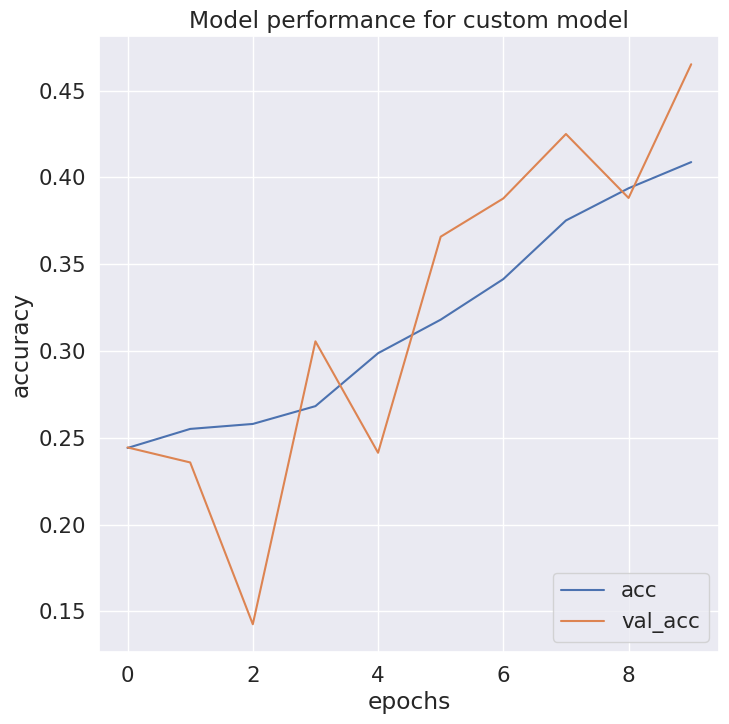

In [63]:

plt.figure(figsize=(8,8))
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Model performance for custom model")
plt.legend(['acc','val_acc'],loc="lower right")
plt.show()

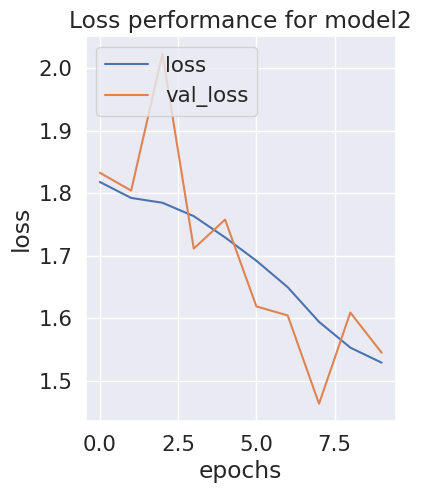

In [149]:
plt.figure(figsize=(4,5))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss performance for model2")
plt.legend(['loss','val_loss'],loc="upper left")
plt.show()

113/113 [==============================] - 8s 63ms/step


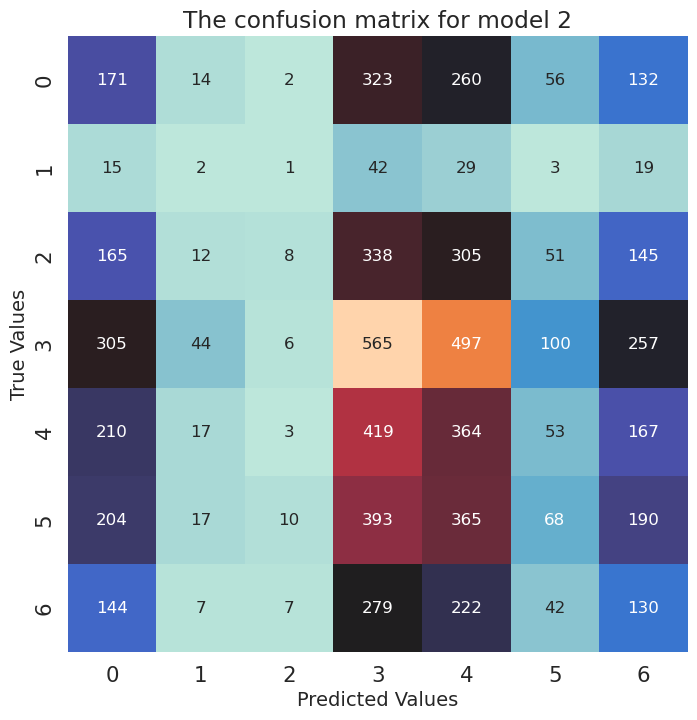

In [65]:
train_classes = np.array(train_gen.classes)
predicted_class = model2.predict(test_gen)
predictions = np.argmax(predicted_class, axis= -1)
actual_classes = np.array(test_gen.classes)

cm = confusion_matrix(actual_classes, predictions)
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(1,1,1)
sns.set(font_scale=1.4) #for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 12},
     cbar = False, fmt = 'd', cmap='icefire');
ax1.set_ylabel('True Values',fontsize=14)
ax1.set_xlabel('Predicted Values',fontsize=14)
plt.title("The confusion matrix for model 2")
plt.show()

In [66]:
from sklearn.metrics import classification_report
classification_report = classification_report(actual_classes, predictions,labels=np.unique(predictions))
print(classification_report)

              precision    recall  f1-score   support

           0       0.14      0.18      0.16       958
           1       0.02      0.02      0.02       111
           2       0.22      0.01      0.02      1024
           3       0.24      0.32      0.27      1774
           4       0.18      0.30      0.22      1233
           5       0.18      0.05      0.08      1247
           6       0.12      0.16      0.14       831

    accuracy                           0.18      7178
   macro avg       0.16      0.15      0.13      7178
weighted avg       0.19      0.18      0.16      7178



The results got somewhat better and the classes are also better than the previous model.

In [41]:
model2.save('cnn_model2_fer.h5')

# Transfer Learning model

In [133]:
loaded_model=tf.keras.models.load_model('cnn_model1_fer.h5')
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 32)       128       
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 32)        0

In [134]:
loaded_model.layers

Setting a model with only convulution layers by removing last 6 dense layers

In [135]:
inputs = keras.Input((48,48,1))
x = inputs
for layer in loaded_model.layers[0:-4]:
    x = loaded_model.get_layer(layer.name)(x)

custom_model = keras.Model(inputs,x)
custom_model.summary()

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 32)       128       
 ormalization)                                            

In [136]:
custom_model.layers[1].get_weights()

[array([[[[ 3.76758464e-02, -1.17312014e-01,  1.67130128e-01,
           -1.20338708e-01, -9.48662311e-02, -5.14749996e-03,
            5.43112978e-02, -1.75310671e-01, -5.52483089e-02,
           -1.60021752e-01, -1.55687928e-01, -7.10128248e-02,
           -5.53211495e-02, -5.51340617e-02, -1.03750437e-01,
           -3.85000631e-02, -1.39734194e-01, -2.12173373e-01,
           -1.12514626e-02,  3.63201462e-03, -2.98264790e-02,
           -6.42100722e-02, -4.07317840e-02, -2.89167818e-02,
            5.98312123e-03, -2.92749461e-02, -4.47855145e-03,
            6.81472719e-02,  1.61415592e-01,  1.23183310e-01,
            1.21312916e-01,  1.86109971e-02]],
 
         [[-1.44089520e-01, -3.58608924e-03,  1.72706127e-01,
            6.51641637e-02, -1.15791984e-01, -1.01901390e-01,
           -7.92485178e-02, -1.52885228e-01, -8.86245072e-02,
            2.75421445e-03, -1.59711674e-01, -8.22891369e-02,
           -3.77760716e-02, -1.95262476e-03, -1.89622231e-02,
           -1.3370545

In [137]:

    train_aug=ImageDataGenerator(rescale=1.0/255,
                                 rotation_range=20,
                                  shear_range=0.2,
                                  zoom_range=0.15,
                                  horizontal_flip=True,
                                  width_shift_range=0.3,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')
    train_gen=train_aug.flow_from_directory('/kaggle/input/ferdata/train',target_size=(48,48),batch_size=64,color_mode='grayscale',class_mode='categorical')


Found 28709 images belonging to 7 classes.


In [138]:

    test_aug=ImageDataGenerator(rescale=1.0/255)
    test_gen=test_aug.flow_from_directory('/kaggle/input/ferdata/test',target_size=(48,48),batch_size=64,color_mode='grayscale',class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [139]:

    inputs = keras.Input((48,48, 1))
    x = inputs

    loaded_model.trainable = False

    for layer in loaded_model.layers[0:-4]:
        x = loaded_model.get_layer(layer.name)(x)

    x = Dense(256, activation='relu')(x)
    x = Dropout(0.25)(x)
    x = Dense(7, activation='softmax')(x)
    custom_model = keras.Model(inputs, x)

    custom_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    custom_model.summary()

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 32)       128       
 ormalization)                                            

In [140]:

    callback3 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [142]:

    history3=custom_model.fit_generator(generator=train_gen, validation_data=test_gen, steps_per_epoch=train_gen.n//64,
                                epochs=15,validation_steps = test_gen.n//64, callbacks=[callback3])

/tmp/ipykernel_28/17513756.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history3=custom_model.fit_generator(generator=train_gen, validation_data=test_gen, steps_per_epoch=train_gen.n//64,


Epoch 1/15
448/448 [==============================] - 48s 108ms/step - loss: 1.4472 - accuracy: 0.4359 - val_loss: 1.3982 - val_accuracy: 0.4747
Epoch 2/15
448/448 [==============================] - 48s 108ms/step - loss: 1.4383 - accuracy: 0.4436 - val_loss: 1.4023 - val_accuracy: 0.4756
Epoch 3/15
448/448 [==============================] - 50s 111ms/step - loss: 1.4363 - accuracy: 0.4436 - val_loss: 1.3890 - val_accuracy: 0.4799
Epoch 4/15
448/448 [==============================] - 56s 125ms/step - loss: 1.4318 - accuracy: 0.4445 - val_loss: 1.3669 - val_accuracy: 0.4840
Epoch 5/15
448/448 [==============================] - 56s 124ms/step - loss: 1.4356 - accuracy: 0.4415 - val_loss: 1.3624 - val_accuracy: 0.4826
Epoch 6/15
448/448 [==============================] - 54s 121ms/step - loss: 1.4286 - accuracy: 0.4478 - val_loss: 1.3669 - val_accuracy: 0.4912
Epoch 7/15
448/448 [==============================] - 51s 114ms/step - loss: 1.4302 - accuracy: 0.4458 - val_loss: 1.3533 - val_ac

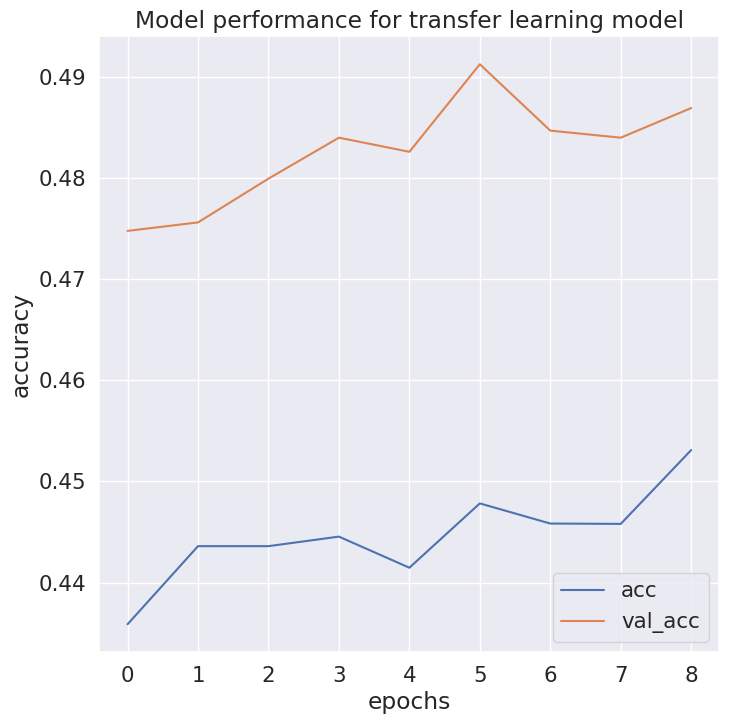

In [150]:

plt.figure(figsize=(8,8))
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Model performance for transfer learning model")
plt.legend(['acc','val_acc'],loc="lower right")
plt.show()

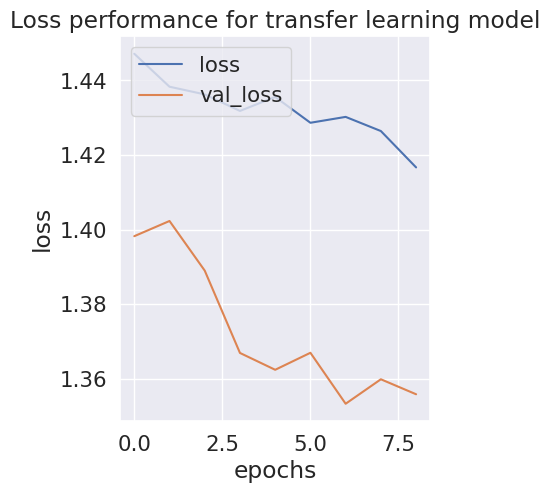

In [144]:
plt.figure(figsize=(4,5))
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss performance for transfer learning model")
plt.legend(['loss','val_loss'],loc="upper left")
plt.show()

In [151]:
train_classes = np.array(train_gen.classes)
predicted_class = custom_model.predict(test_gen)
predictions = np.argmax(predicted_class, axis= -1)
actual_classes = np.array(test_gen.classes)

cm = confusion_matrix(actual_classes, predictions)
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(1,1,1)
sns.set(font_scale=1.4) #for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 12},
     cbar = False, fmt = 'd', cmap='icefire');
ax1.set_ylabel('True Values',fontsize=14)
ax1.set_xlabel('Predicted Values',fontsize=14)
plt.title("The confusion matrix for transfer learning model")
plt.show()

113/113 [==============================] - 7s 59ms/step


In [146]:
from sklearn.metrics import classification_report
classification_report = classification_report(actual_classes, predictions,labels=np.unique(predictions))
print(classification_report)

              precision    recall  f1-score   support

           0       0.14      0.11      0.13       958
           1       0.00      0.00      0.00       111
           2       0.13      0.07      0.09      1024
           3       0.25      0.25      0.25      1774
           4       0.18      0.25      0.21      1233
           5       0.18      0.24      0.21      1247
           6       0.12      0.09      0.10       831

    accuracy                           0.18      7178
   macro avg       0.14      0.15      0.14      7178
weighted avg       0.18      0.18      0.18      7178



# Models Comparision

Among all three models tried on the emotion recognition dataset. The custom model performace is better than other models on the basis of model convergence on loss. As we have used rmsprop as an optimizer. And even the classes are better for the custom model on the basis of precision recall and F1 score for all the classes. The transfer learning model on the other hand is overtrained is overfitting. 

# 3 Things for improvement

1) The model should be trained for more number of epochs without early stopping or atleast patience parameter in the early stopping should be high. 
2) Use of L1, L2 regularization in the model architecture. As this will reduce the overfitting significantly. 
3) Handling the class imbalace problem may also improve the models performance as there is a lot of class imbalace which could lead to more bias to the model. 